In [139]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import cross_validation, datasets, metrics, neighbors 

import numpy as np

In [140]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [141]:
classification_problem = datasets.make_classification(n_samples = 100, n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=5)

In [142]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

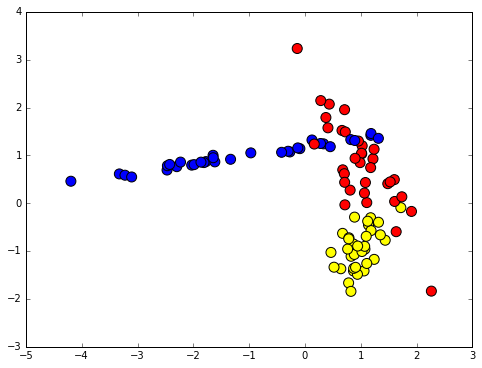

In [143]:
plt.figure(figsize=(8,6))
plt.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)
plt.show()

Разобьем выборку на тестовую и обучающую в отношении 3:7

In [144]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

Функции для построения разделяющей поверхности

In [145]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [146]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

Рассмотрим k = 1, 5, 25, 50, 60 и построим для этих значений разделяющие поверхности, получаемые при решении задачи классификации методом k ближайших соседей. Найдем массив accuracy для разных k.

In [147]:
array_of_k = [1, 5, 25, 50, 60]

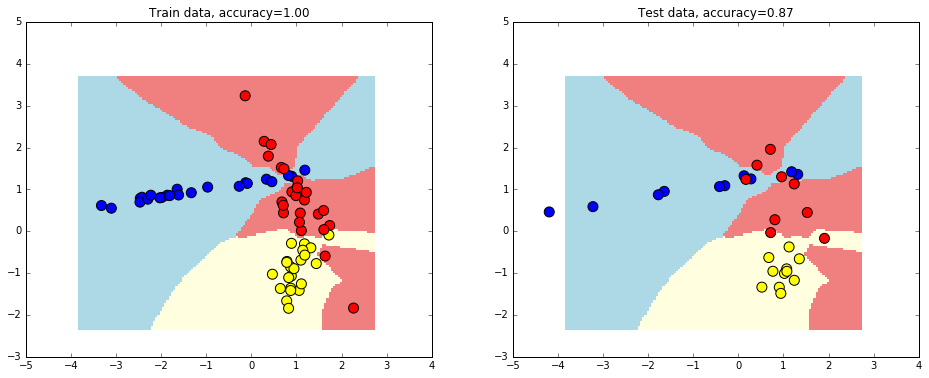

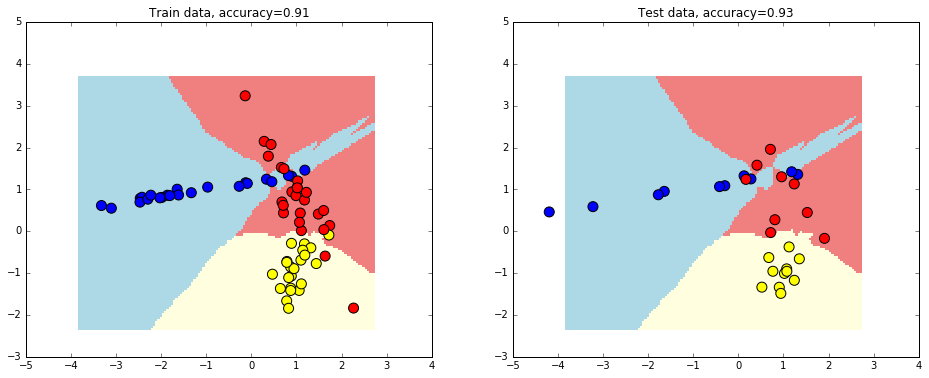

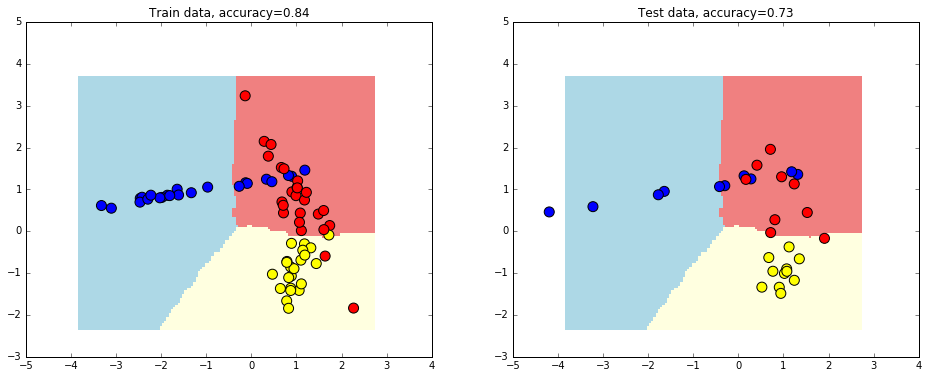

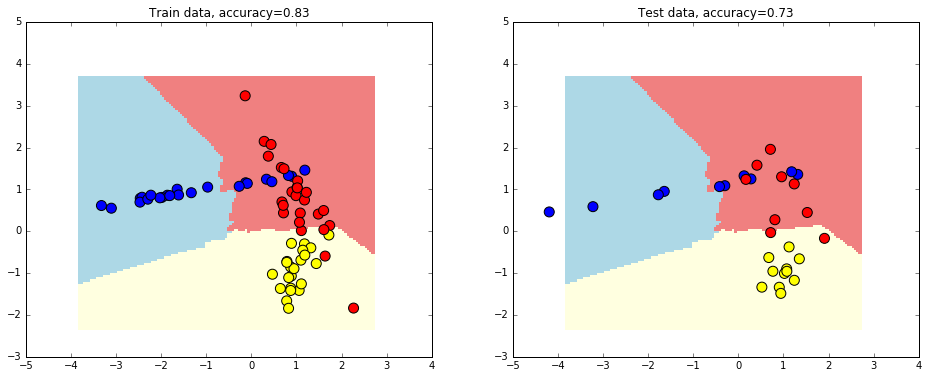

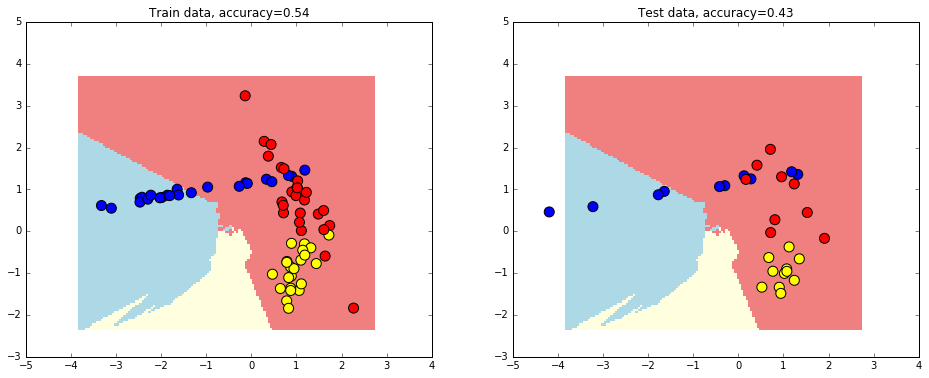

In [148]:
for k in range(1, 71):
    estimator = neighbors.KNeighborsClassifier(n_neighbors = k)
    if k in array_of_k:
        plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Рассмотрим 5-fold cross-validation.

In [149]:
accuracy_mean = []
array_all_k = []

In [150]:
for k in range(1, 71):
    accuracy = []
    estimator = neighbors.KNeighborsClassifier(n_neighbors = k)  
    array_all_k.append(k)
    for train_indices, test_indices in cross_validation.KFold(100, n_folds = 5):
        estimator.fit(train_data, train_labels)
        prediction = estimator.predict(test_data)
        accuracy.append(metrics.accuracy_score(test_labels, prediction))
    accuracy_mean.append(np.mean(accuracy))

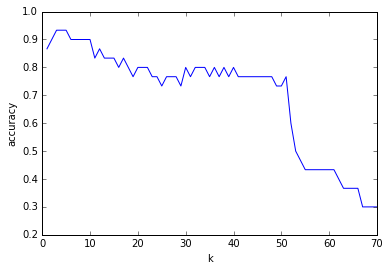

In [151]:
plt.plot(array_all_k, accuracy_mean)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [152]:
for i in range(1, 10):
    print(i, accuracy_mean[i])

1 0.9
2 0.933333333333
3 0.933333333333
4 0.933333333333
5 0.9
6 0.9
7 0.9
8 0.9
9 0.9


Оптимальное значение k: 2, 3, 4